In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190104/datetime_per_area/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
area_list = [str(i) for i in range(36)]
times_list = [i+0.5 for i in range(5)]

In [4]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            for _area in area_list:
                df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                    index_col=0,
                                                    encoding='Shift_JISx0213')
                df.reset_index(drop=True, inplace=True)
                csv_array[_dir][_seed][_csv][_area] = df

In [5]:
people = 'people30000'
seed = '123'
csv = 'census'
area = '4'

In [6]:
df = csv_array[people][seed][csv][area].copy()
df

,ds,y
0,1900-01-01T01:00:00.000000000,0
1,1900-01-01T02:00:00.000000000,0
2,1900-01-01T03:00:00.000000000,0
3,1900-01-01T04:00:00.000000000,0
4,1900-01-01T05:00:00.000000000,0
5,1900-01-01T06:00:00.000000000,0


In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

import seaborn as sns
def create_regplot(df, order=3):
    trainX = df['ds'].values.reshape(-1, 1)
    trainY = df['y'].values.reshape(-1, 1)
    Px = np.arange(0, len(trainX), 1)
    
    ax = sns.regplot(x=Px, y=trainY, order=order, ci=75)
    z = np.polyfit(Px, trainY, 3)
    z = np.squeeze(z)
    p = np.poly1d(z)
#     print(p)
    return  p

In [28]:
def culculate_3d_regression(df, x):
    p = create_regplot(df)
    p = np.asanyarray(p)
    try:
        y = p[0]*x**3 + p[1]*x**2 + p[2]*x + p[3]
        return y
    except:
        return 0

<class 'matplotlib.axes._subplots.AxesSubplot'>


1305.7460317460304

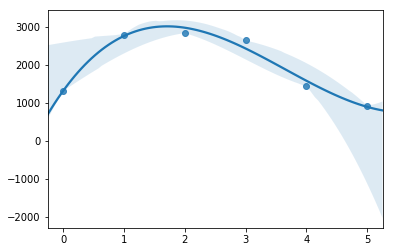

In [29]:
area = '27'
x = 0
df = csv_array[people][seed][csv][area].copy()
culculate_3d_regression(df, x)

In [10]:
main_array = {}
for _dir in dir_list:
    main_array[_dir] = {}
    for _seed in seed_list:
        main_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv('/Users/kessapassa/OneDrive/research_log/20190104/2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                encoding='Shift_JISx0213')
            main_array[_dir][_seed][_csv] = df

In [11]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            df_array = pd.DataFrame()
            for _area in area_list:
                for _times in times_list:
                    _people = culculate_3d_regression(csv_array[_dir][_seed][_csv][_area].copy(), _times)
                    _times = int(_times*3600)
                    tmp = pd.DataFrame([_times, _area, _people], index=['time', 'area', 'people'])
                    tmp = tmp.T
                    df_array = pd.concat([df_array, tmp])
            df = pd.concat([main_array[_dir][_seed][_csv], df_array])
            df[['time', 'area']] = df[['time', 'area']].applymap(lambda x: int(x))
            df['people'] = df['people'].apply(lambda x: 0 if x< 0 else x)
            df['people'] = df['people'].apply(lambda x: math.floor(x))
            df.sort_values(['time', 'area'], inplace=True)
            df.reset_index(drop=True, inplace=True)
#             df.to_csv('/Users/kessapassa/OneDrive/research_log/20190104/more_detail_2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv')
            main_array[_dir][_seed][_csv] = df

In [12]:
people = 'people30000'
seed = '123'
csv = 'census'
main_array[people][seed][csv]

,time,area,people
0,1800,0,1
1,1800,1,4
2,1800,2,22
3,1800,3,0
4,1800,4,0
5,1800,5,0
6,1800,6,206
7,1800,7,5
8,1800,8,84
9,1800,9,21
